# Exploratory Data Analysis 

In [121]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [123]:
#laptop
#data_path = Path('/Users/zack/Library/Mobile Documents/com~apple~CloudDocs/DATA SCIENCE PROJECTS/Cars/Data Prep & Cleaning')
data_path = Path('/Users/z/Library/Mobile Documents/com~apple~CloudDocs/DATA SCIENCE PROJECTS/Cars/Data Prep & Cleaning')
car_data_df = pd.read_csv(data_path / 'car_data_cleaned.csv')
print('Data imported')

Data imported


## Descriptive Statistics

In [3]:
print(car_data_df.info()) 
print('\n')
print('Cars.com DataFrame:')
print(car_data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82853 entries, 0 to 82852
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Listing ID  82853 non-null  object
 1   Trim        82853 non-null  object
 2   Make        82853 non-null  object
 3   Year        82853 non-null  int64 
 4   Model       82853 non-null  object
 5   Price       82853 non-null  int64 
 6   Body Style  82853 non-null  object
 7   City        82853 non-null  object
 8   State       82853 non-null  object
 9   Mileage     82853 non-null  int64 
 10  Stock Type  82853 non-null  object
dtypes: int64(3), object(8)
memory usage: 7.0+ MB
None


Cars.com DataFrame:
                             Listing ID            Trim       Make  Year  \
0  f41e479e-4d07-42ba-850c-9f9dd21a0d2f        lt cloth  chevrolet  2020   
1  04de8d78-9d1a-407d-aa08-4259f598f589  stingray w/1lt  chevrolet  2016   
2  0ceae6e2-43bd-4a6d-9eaf-ac5ae2a7a703          custom  chevrolet

In [74]:
car_data_df.drop(columns=['Listing ID'], inplace=True) # Listing id's are irrelevant
car_data_df.drop(columns=['Stock Type'], inplace=True) # All stock type is 'used' 
print('Updataed Cars.com DataFrame:')
print(car_data_df.head())

Updataed Cars.com DataFrame:
             Trim       Make  Year           Model  Price    Body Style  \
0        lt cloth  chevrolet  2020        traverse  25988           suv   
1  stingray w/1lt  chevrolet  2016  silverado 1500  23995  pickup truck   
2          custom  chevrolet  2021  silverado 1500  32980  pickup truck   
3  stingray w/1lt  chevrolet  2018  silverado 1500  29250  pickup truck   
4             1ls  chevrolet  2022           spark  13000     hatchback   

            City State  Mileage  
0     Pittsburgh    PA    51375  
1    Tallahassee    FL    98658  
2  East Hartford    CT    53326  
3      Caledonia    MI    40000  
4   St Augustine    FL    47825  


In [5]:
print(car_data_df['Body Style'].value_counts()) 
print('\n')
print(car_data_df['Make'].value_counts())
print('\n')
print(car_data_df['State'].value_counts()) 

Body Style
suv              45273
sedan            16046
pickup truck     14661
hatchback         2917
coupe             1387
passenger van     1047
wagon              552
cargo van          536
convertible        366
minivan             68
Name: count, dtype: int64


Make
gmc          8685
jeep         8542
chevrolet    8463
ford         8386
kia          8347
nissan       8291
subaru       8217
hyundai      8172
toyota       8120
honda        7630
Name: count, dtype: int64


State
FL    7246
CA    6076
TX    6032
OH    4729
IL    3432
PA    3353
NY    3101
NC    2822
VA    2736
NJ    2655
IN    2600
GA    2578
TN    2393
MI    2282
WI    2271
AZ    2196
MN    2066
MD    2049
CO    1995
MO    1852
KY    1636
WA    1563
MA    1339
SC    1315
AL    1288
CT    1010
OR     922
NV     854
OK     829
IA     780
KS     748
UT     656
LA     642
NE     563
AR     546
NH     497
MS     443
ID     399
WV     387
NM     354
ND     352
DE     189
VT     183
MT     171
ME     168
RI     163
SD    

In [76]:
print("Number of Rows and Columns:", car_data_df.shape)
print("\n")

print("Summary Statistics:")
print(round(car_data_df.describe(include='object'),1))
print("\n")
print(round(car_data_df.describe(),1))

Number of Rows and Columns: (82853, 9)


Summary Statistics:
           Trim   Make        Model Body Style      City  State
count     82853  82853        82853      82853     82853  82853
unique      625     10          282         10      3211     51
top     limited    gmc  sierra 1500        suv  Columbus     FL
freq       5236   8685         2851      45273       617   7246


          Year     Price   Mileage
count  82853.0   82853.0   82853.0
mean    2019.6   26747.4   55645.3
std        3.1   13173.6   40373.6
min     2010.0    2000.0    1000.0
25%     2018.0   17995.0   24516.0
50%     2021.0   24389.0   45881.0
75%     2022.0   32488.0   79456.0
max     2024.0  148990.0  250000.0


In [149]:
distribution = pd.crosstab(car_data_df['Body Style'], car_data_df['Make'])
distribution_percentage = pd.crosstab(car_data_df['Body Style'], car_data_df['Make'], normalize='columns') * 100

print(distribution,'\n\n', round(distribution_percentage,2))

Make           chevrolet  ford   gmc  honda  hyundai  jeep   kia  nissan  \
Body Style                                                                 
cargo van             77   253   121      0        0     0     0      85   
convertible          184   125     0      0        0    48     0       9   
coupe                557   405     0    185       31     0    13      53   
hatchback            192   124     0    495      329     0   879     127   
minivan                0     0     0     18        0     0     6       1   
passenger van         13     9     0    521        0     0   237      23   
pickup truck        3029  3376  4401    244      192   511     0    1137   
sedan                902   596     0   2657     2868     0  2746    2647   
suv                 3425  3476  4163   3509     4752  7983  4361    4200   
wagon                 84    22     0      1        0     0   105       9   

Make           subaru  toyota  
Body Style                     
cargo van           0  

In [13]:
from ydata_profiling import ProfileReport

profile = ProfileReport(car_data_df,title="Cars.com Report")

profile.to_file("cars_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
correlation_matrix = car_data_df[['Price', 'Mileage', 'Year']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
             Price   Mileage      Year
Price    1.000000 -0.506005  0.559668
Mileage -0.506005  1.000000 -0.757339
Year     0.559668 -0.757339  1.000000


## Visualizing Data

### Histograms for Price, Mileage and Year

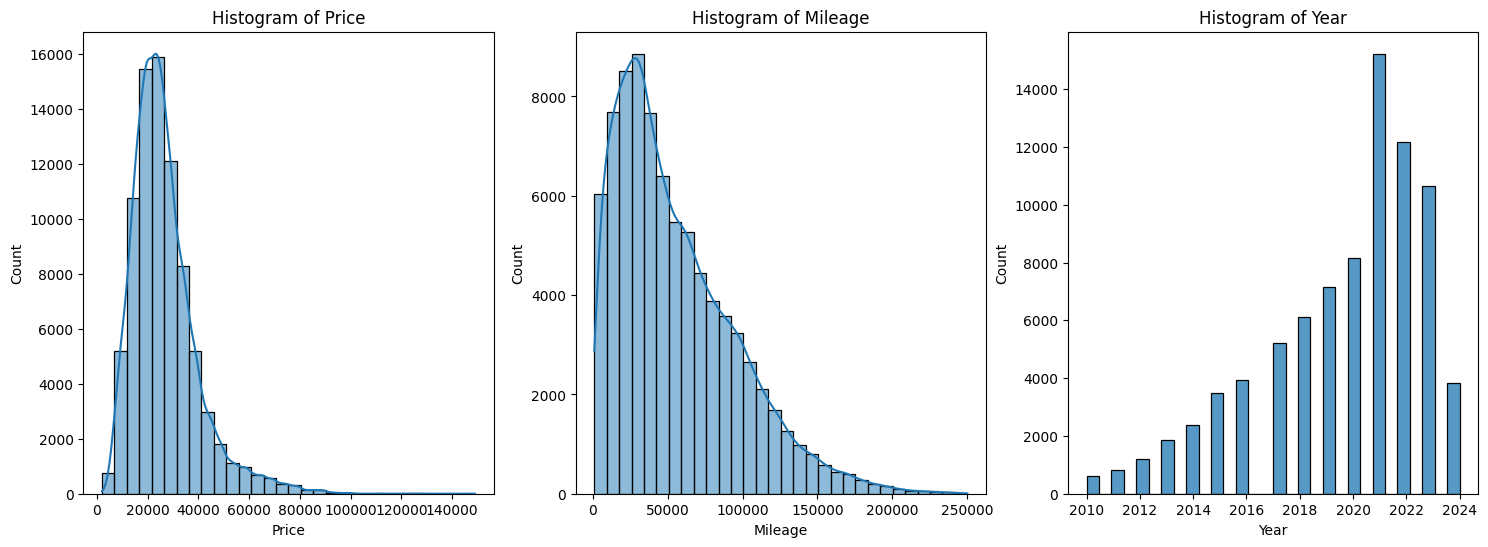

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(car_data_df['Price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')

sns.histplot(car_data_df['Mileage'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Mileage')

sns.histplot(car_data_df['Year'], bins=30, kde=False, ax=axes[2])
axes[2].set_title('Histogram of Year')
plt.show()

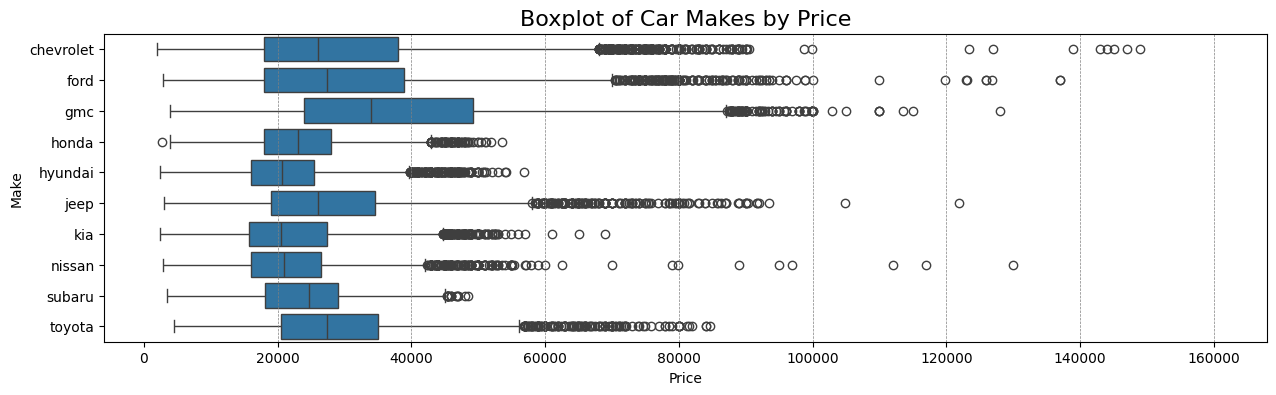

In [201]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="Price", y="Make", data=car_data_df)
plt.title("Boxplot of Car Makes by Price", fontsize=16)

# Add vertical lines at each $20,000 interval
for price in range(20000, int(car_data_df['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

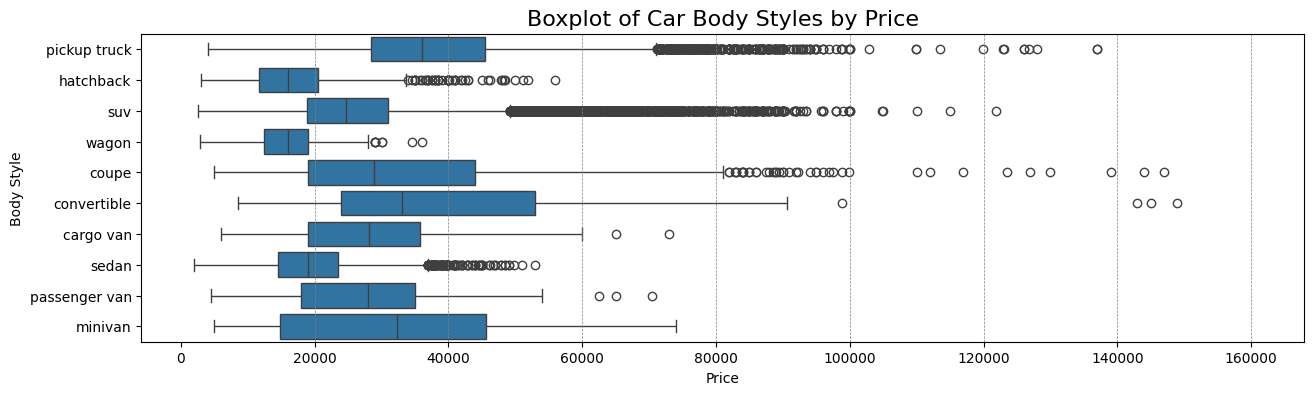

In [207]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="Price", y="Body Style", data=car_data_df)
plt.title("Boxplot of Car Body Styles by Price", fontsize=16)

# Add vertical lines at each $20,000 interval
for price in range(20000, int(car_data_df['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

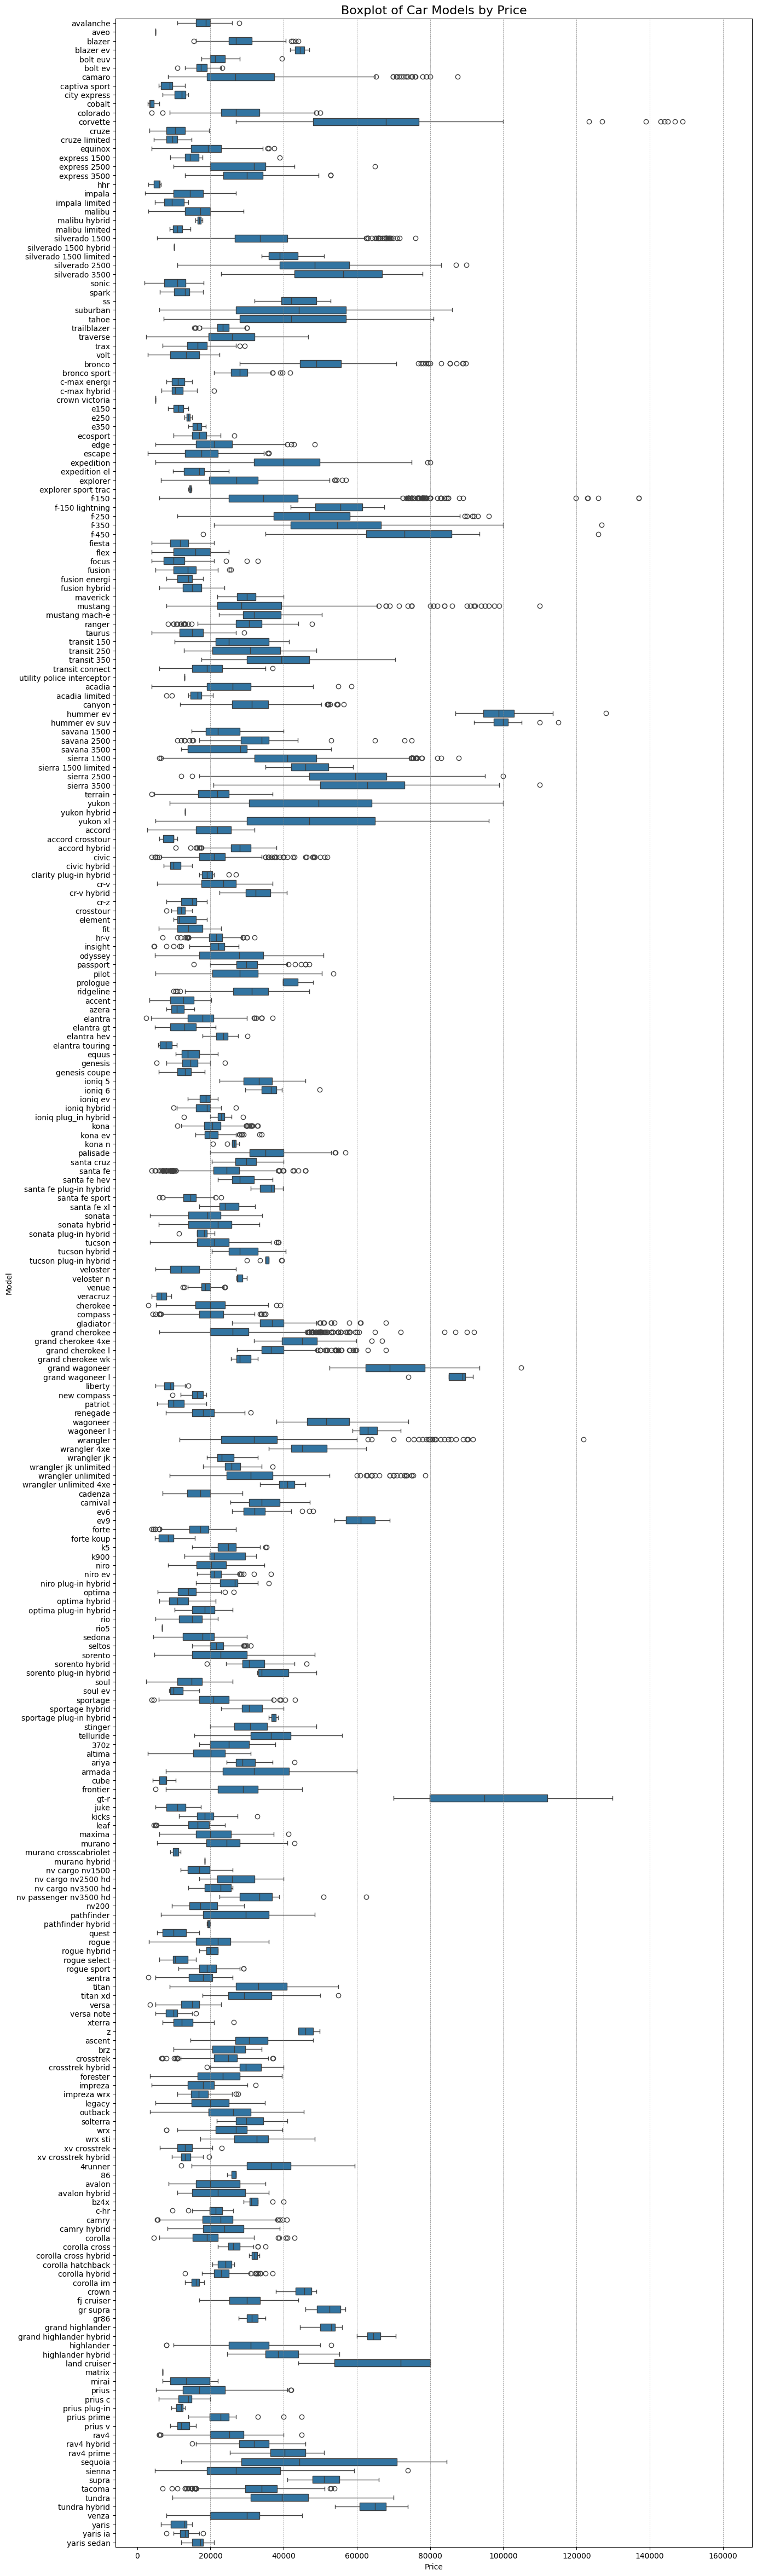

In [205]:
plt.figure(figsize=(15, 60))  
sns.boxplot(x="Price", y="Model", data=car_data_df)
plt.title("Boxplot of Car Models by Price", fontsize=16)

for price in range(20000, int(car_data_df['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

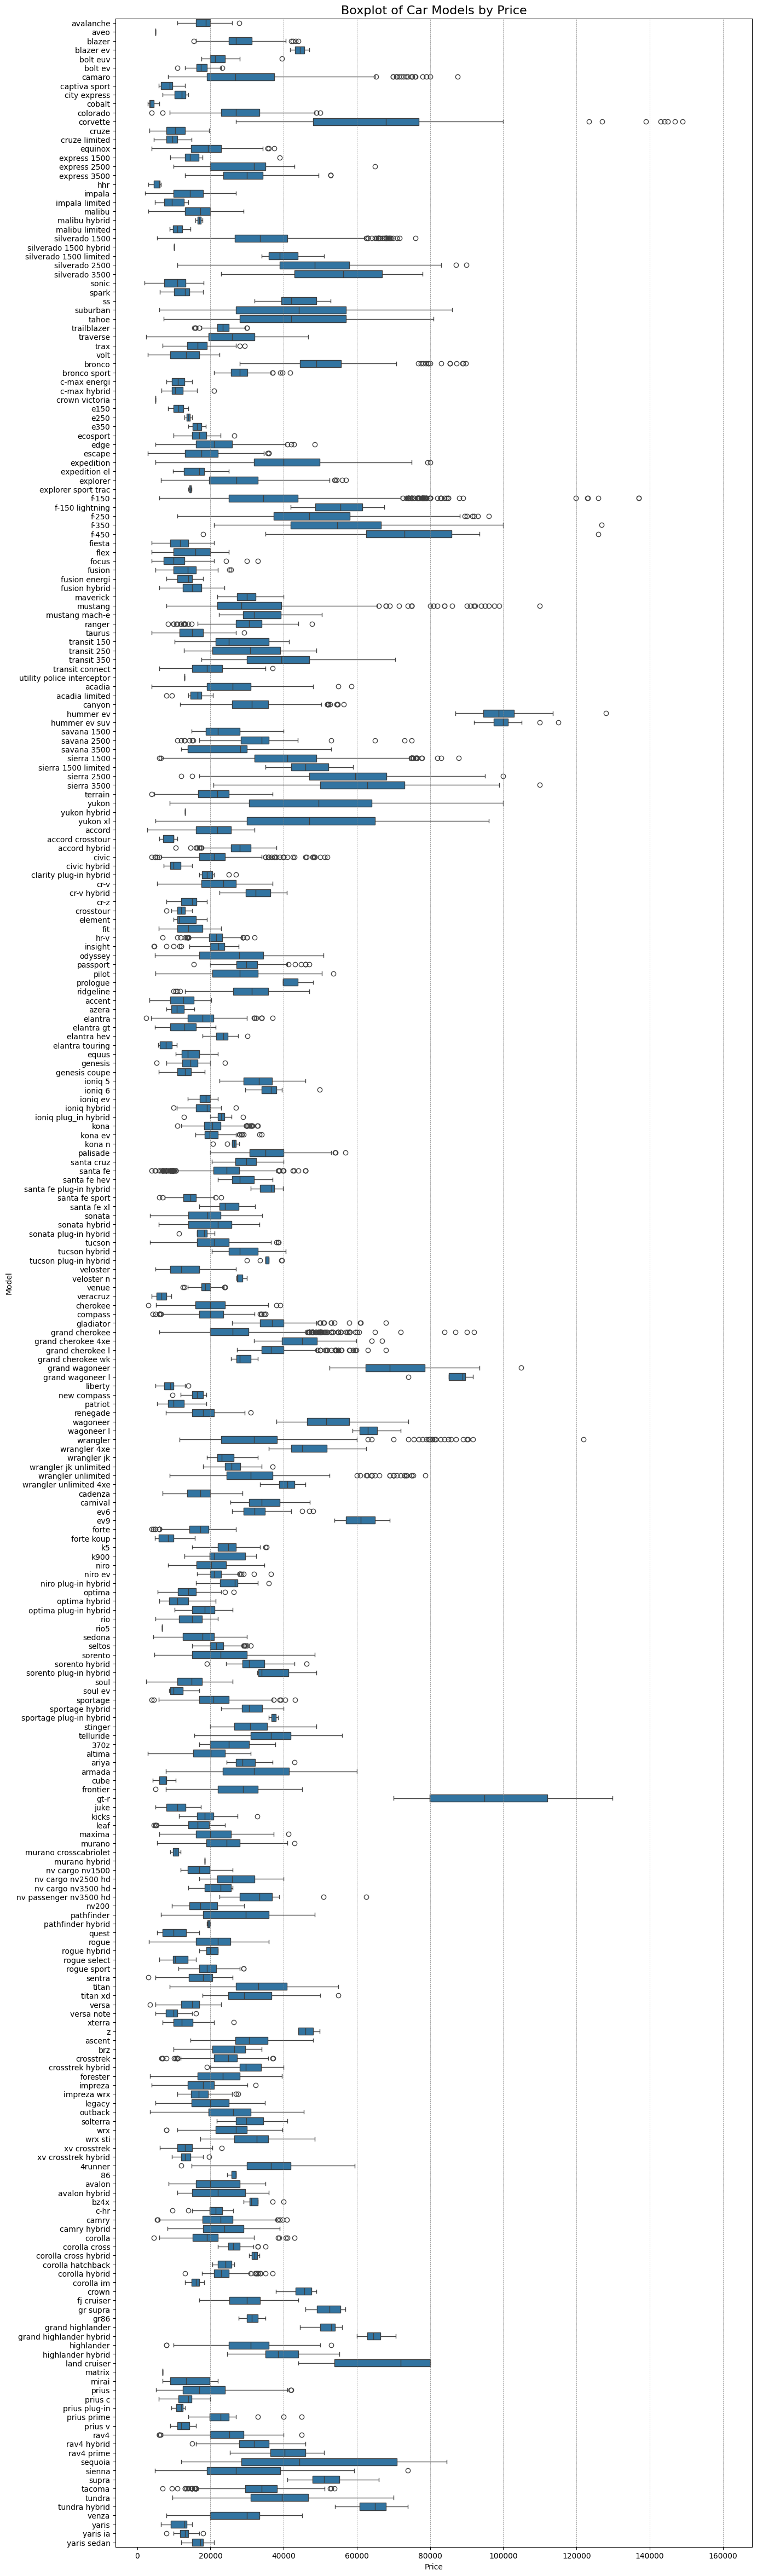

In [205]:
plt.figure(figsize=(15, 60))  
sns.boxplot(x="Price", y="Model", data=car_data_df)
plt.title("Boxplot of Car Models by Price", fontsize=16)

for price in range(20000, int(car_data_df['Price'].max()) + 20000, 20000):
    plt.axvline(x=price, color='gray', linestyle='--', linewidth=0.5)

plt.show()

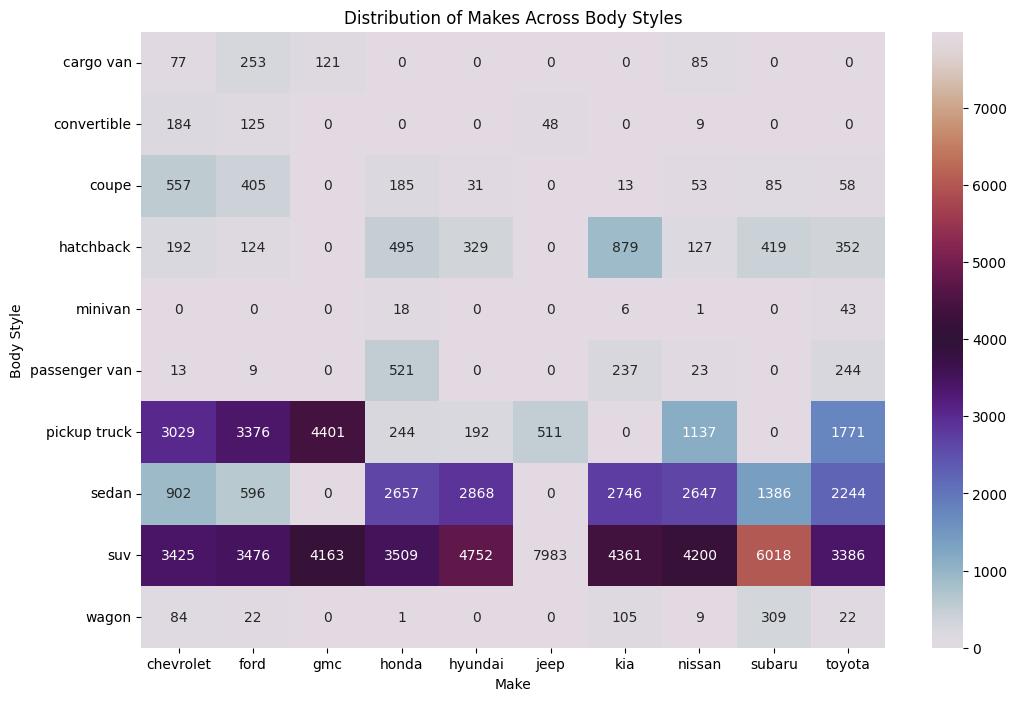

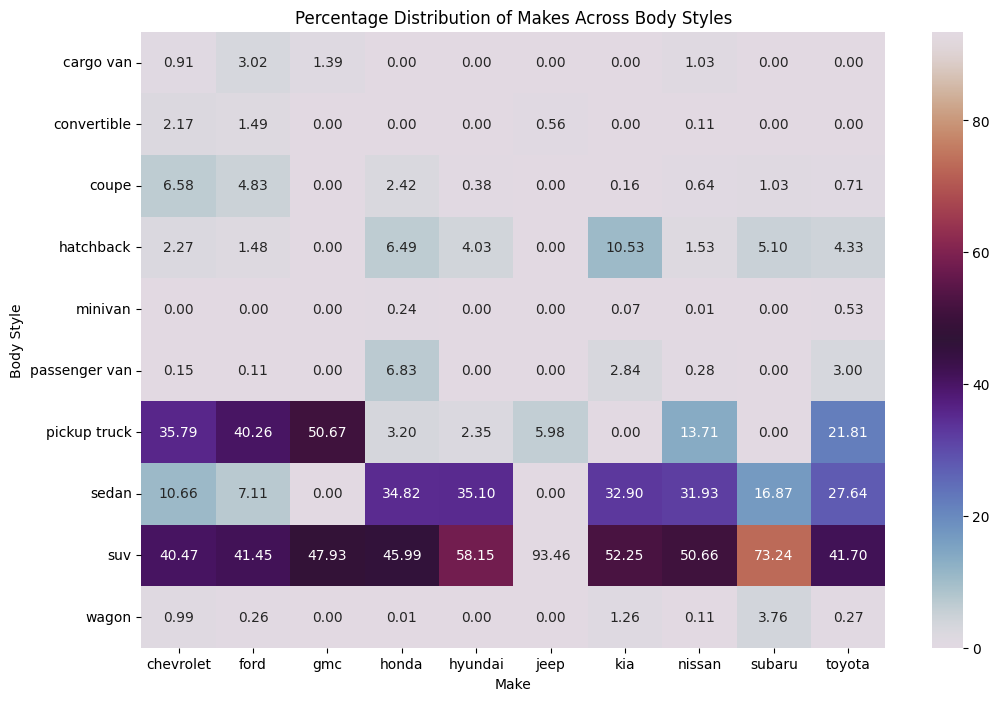

In [171]:
plt.figure(figsize=(12, 8))
sns.heatmap(distribution, annot=True, fmt="d", cmap="twilight")
plt.title("Distribution of Makes Across Body Styles")

plt.figure(figsize=(12, 8))
sns.heatmap(distribution_percentage, annot=True, fmt=".2f", cmap="twilight")
plt.title("Percentage Distribution of Makes Across Body Styles")

plt.show()

In [ ]:
car_data_df_encoded = pd.get_dummies(car_data_df, columns=['Make', 'Model', 'Body Style', 'Year', ], drop_first=True)

In [51]:
cov_matrix = car_data_df[['Price', 'Mileage', 'Year']].cov()
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
                 Price       Mileage          Year
Price    1.735429e+08 -2.691257e+08  23174.371437
Mileage -2.691257e+08  1.630027e+09 -96108.462003
Year     2.317437e+04 -9.610846e+04      9.879792


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = car_data_df[['Mileage', 'Year']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
    Feature       VIF
0  Mileage  2.890224
1     Year  2.890224


In [47]:
# Function to find outliers using the Interquartile Range (IQR) method
def find_outliers_iqr(df, column_name):
    """
    Identifies outliers in a specified column using the Interquartile Range (IQR) method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to search for outliers.
    column_name (str): The name of the column to check for outliers.
    
    Returns:
    pd.DataFrame: A DataFrame containing the rows with outliers.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Function to find outliers using the Z-score method
def find_outliers_zscore(df, column_name):
    """
    Identifies outliers in a specified column using the Z-score method.
    """
    z_scores = np.abs(stats.zscore(df[column_name]))
    return df[z_scores > 3]
# Find outliers in 'Price' and 'Mileage' using IQR method
price_outliers = find_outliers_iqr(car_data_df, 'Price')
mileage_outliers = find_outliers_iqr(car_data_df, 'Mileage')

# Find outliers in 'Price' and 'Mileage' using Z-score method
price_outliers_z = find_outliers_zscore(car_data_df, 'Price')
mileage_outliers_z = find_outliers_zscore(car_data_df, 'Mileage')

print(f"Number of price outliers (IQR): {len(price_outliers)}")
print(f"Number of mileage outliers (IQR): {len(mileage_outliers)}")
print(f"Number of price outliers (Z-score): {len(price_outliers_z)}")
print(f"Number of mileage outliers (Z-score): {len(mileage_outliers_z)}")

Number of price outliers (IQR): 3613
Number of mileage outliers (IQR): 1566
Number of price outliers (Z-score): 1529
Number of mileage outliers (Z-score): 857


chevrolet: Depreciation Rate = -2745.24 dollars/year
ford: Depreciation Rate = -3131.75 dollars/year
gmc: Depreciation Rate = -4149.51 dollars/year
honda: Depreciation Rate = -1837.23 dollars/year
hyundai: Depreciation Rate = -1958.32 dollars/year
jeep: Depreciation Rate = -2744.78 dollars/year
kia: Depreciation Rate = -2263.88 dollars/year
nissan: Depreciation Rate = -1838.14 dollars/year
subaru: Depreciation Rate = -2001.62 dollars/year
toyota: Depreciation Rate = -2082.76 dollars/year


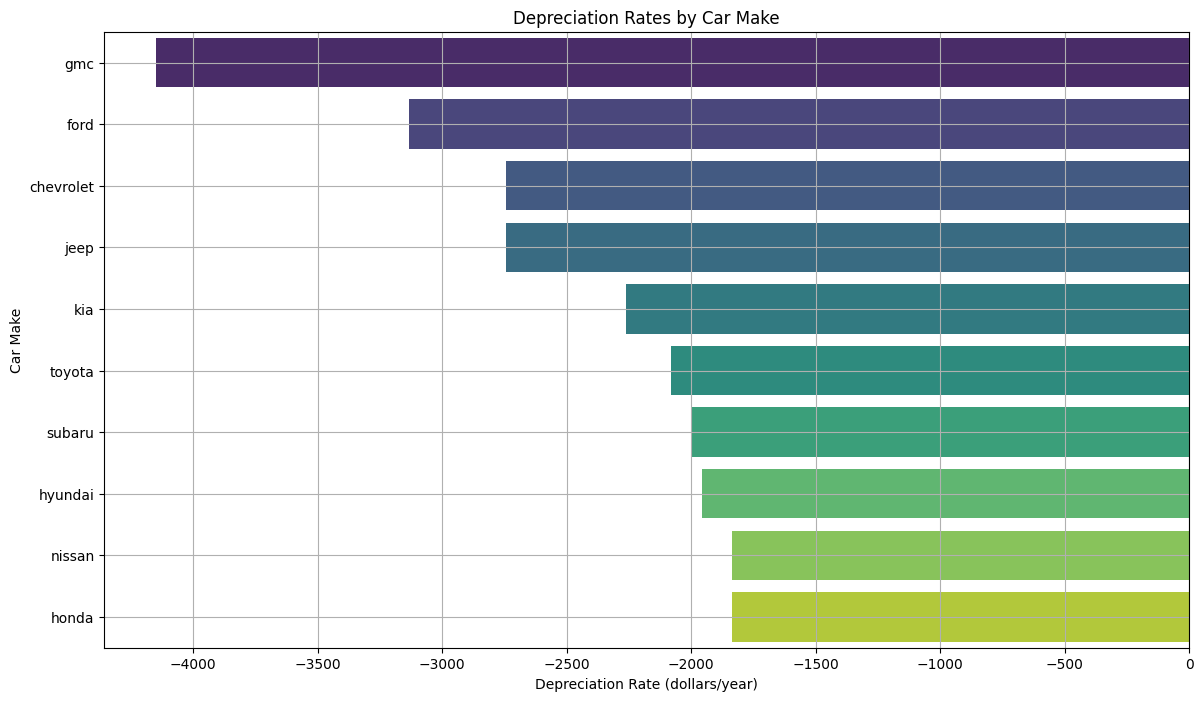

In [49]:
car_data_df['Car Age'] = 2024 - car_data_df['Year']

makes = car_data_df['Make'].unique()
depreciation_rates = {}

for make in makes:
    make_df = car_data_df[car_data_df['Make'] == make]
    X = make_df['Car Age'].values.reshape(-1, 1)
    y = make_df['Price'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    depreciation_rates[make] = {'model': model, 'slope': model.coef_[0], 'intercept': model.intercept_}

depreciation_data = []
for make, results in depreciation_rates.items():
    slope = round(results['slope'], 2)
    depreciation_data.append((make, slope))
    print(f"{make}: Depreciation Rate = {slope} dollars/year")

depreciation_df = pd.DataFrame(depreciation_data, columns=['Make', 'Depreciation Rate'])

depreciation_df = depreciation_df.sort_values(by='Depreciation Rate')

plt.figure(figsize=(14, 8))
sns.barplot(x='Depreciation Rate', y='Make', data=depreciation_df, hue='Make', palette='viridis')
plt.title('Depreciation Rates by Car Make')
plt.xlabel('Depreciation Rate (dollars/year)')
plt.ylabel('Car Make')
plt.grid(True)
plt.show()
